In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import random
from math import pi
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

# Preprocessing

In [2]:
audio_5k = pd.read_csv('data/df_audio_features_5000')

## Remove white spaces in column names

In [3]:
audio_5k.columns = audio_5k.columns.str.strip()

In [4]:
audio_5k.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')

## Drop the object type columns

In [5]:
audio_5k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5235 non-null   object 
 1   artist            5235 non-null   object 
 2   danceability      5235 non-null   float64
 3   energy            5235 non-null   float64
 4   key               5235 non-null   int64  
 5   loudness          5235 non-null   float64
 6   mode              5235 non-null   int64  
 7   speechiness       5235 non-null   float64
 8   acousticness      5235 non-null   float64
 9   instrumentalness  5235 non-null   float64
 10  liveness          5235 non-null   float64
 11  valence           5235 non-null   float64
 12  tempo             5235 non-null   float64
 13  type              5235 non-null   object 
 14  duration_ms       5235 non-null   int64  
 15  time_signature    5235 non-null   int64  
 16  id                5235 non-null   object 


Type is empty and can be removed

We don't need to consider duration and Time of songs for clustering

In [6]:
audio_df = audio_5k.drop(['name', 'artist','id', 'html', 'type', 'time_signature', 'duration_ms'], axis=1)

# Modelling

## Scale/Normalise the data

In [7]:
audio_norm_df = MinMaxScaler().fit_transform(audio_df)
audio_norm_df = pd.DataFrame(audio_norm_df, columns=audio_df.columns, index=audio_5k.name)
audio_norm_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,0.680455,0.2590,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
Saudade De Bahia,0.767322,0.3990,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
"Canta Canta, Minha Gente",0.880041,0.7300,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862
Mulher Eu Sei,0.729059,0.0502,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
Rosa Morena,0.673216,0.1190,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171


## K-Means exploration of clusters

### Inertia Method (Elbow Plot)

In [8]:
inertia_list = []
for i in range(1,30):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(audio_norm_df)
    inertia_list.append(round(myKMeans.inertia_))
inertia_list

[4576,
 3363,
 2603,
 2188,
 1980,
 1782,
 1621,
 1466,
 1373,
 1284,
 1236,
 1159,
 1114,
 1067,
 1031,
 997,
 975,
 953,
 931,
 907,
 893,
 878,
 861,
 848,
 834,
 821,
 812,
 796,
 788]

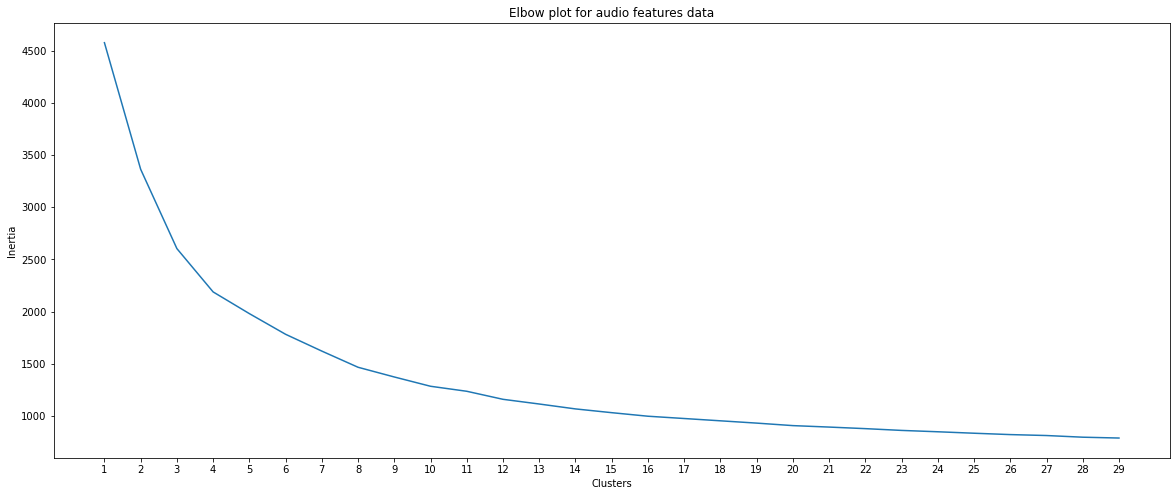

In [9]:
plt.figure(figsize=(20, 8))
sns.lineplot(x=range(1,30), y= inertia_list)
plt.title('Elbow plot for audio features data')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,30))
plt.show()

According to above plot, four clusters seems to be the elbow point.

In [10]:
silhouette_scores = []
for i in range(2,30):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(audio_norm_df)
    silhouette_scores.append(silhouette_score(audio_norm_df, myKMeans.labels_))

silhouette_scores

[0.2870679917880365,
 0.3135687289510343,
 0.2871240569761251,
 0.2900419699623886,
 0.3008423517160413,
 0.27760699212091144,
 0.28546705065247663,
 0.26476017654168515,
 0.2579907599045692,
 0.26531387221954433,
 0.25372017228436244,
 0.24982457322489005,
 0.2525733643423557,
 0.24559389175227864,
 0.23450361133486292,
 0.24179168504959112,
 0.23403046240264494,
 0.22587791439783353,
 0.21959247563163622,
 0.21579904221021776,
 0.2156298997644601,
 0.19937740295891831,
 0.2099375031300124,
 0.21456665631893695,
 0.20049914846498595,
 0.19968665651769482,
 0.20903625357940953,
 0.19942345778846976]

### Silhouette Scores

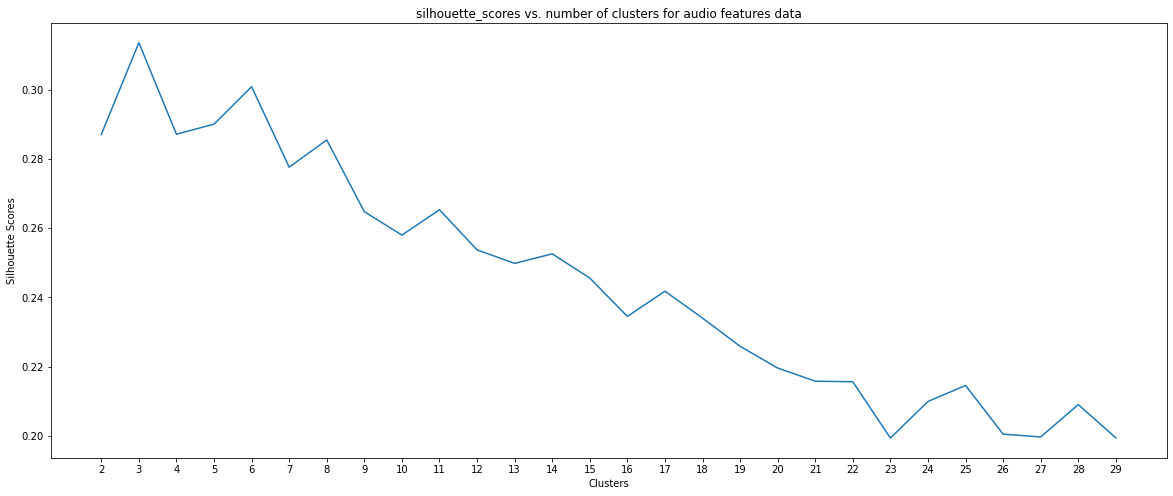

In [11]:
plt.figure(figsize=(20, 8))
sns.lineplot(x=range(2,30), y= silhouette_scores)
plt.title('silhouette_scores vs. number of clusters for audio features data')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Scores')
plt.xticks(range(2,30))
plt.show()

From the above plot we should select a local maxima. With low number of clusters, clusters sizes will be high. So we should not choose low number of clusters. From the above plot 11 seems to be a good point. 

After analysing cluster sizes, 25 clusters give acceptable results according to me.

## Kmeans final model

In [12]:
num_clusters = 25

Create final kmeans model

In [13]:
m_km = KMeans(n_clusters=num_clusters)
m_km.fit(audio_norm_df)
audio_norm_df['cluster'] = m_km.labels_

audio_norm_df.groupby('cluster').agg({'danceability':'count'})

,danceability
cluster,
0,257
1,148
2,231
3,439
4,178
5,219
6,138
7,115
8,302


# Exploratory analysis for 25 clusters

## Univariate exploration

In [14]:
# Function to plot univariate data
def plot_1d_feature_line(df, x):
    x_df = df.groupby('cluster').agg({x:'mean'})
    plt.figure(figsize=(10,3))
    plt.title(x + ' vs Cluster')
    sns.lineplot(x=x_df.index, y=x_df[x])
    plt.xticks(range(0, num_clusters))
    plt.show()

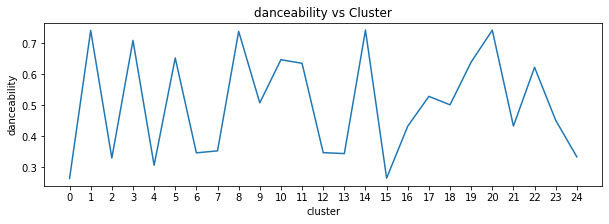

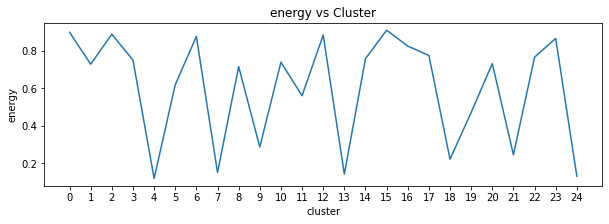

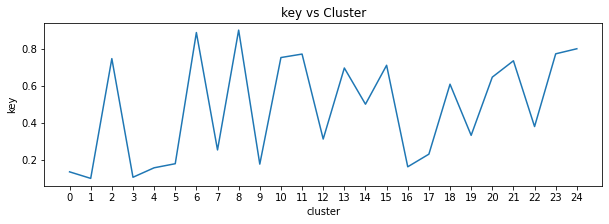

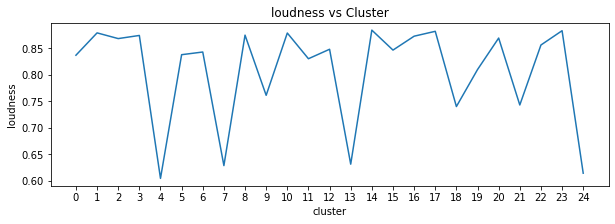

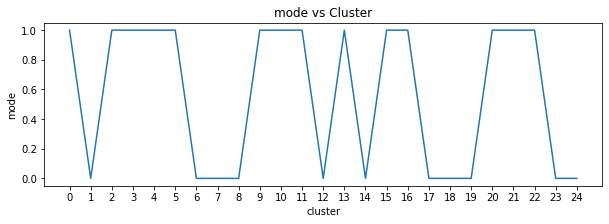

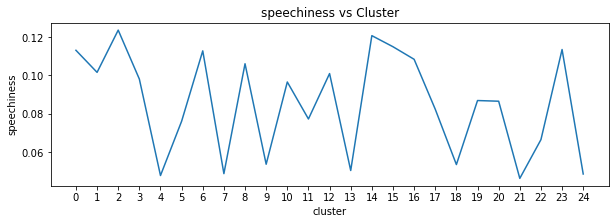

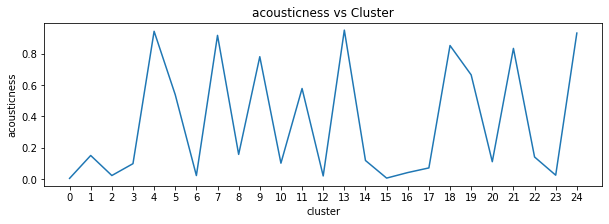

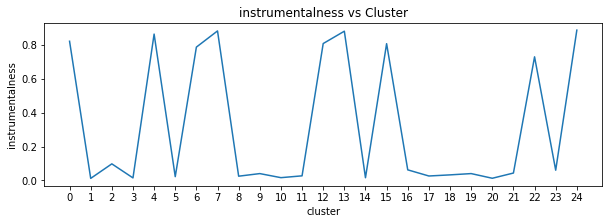

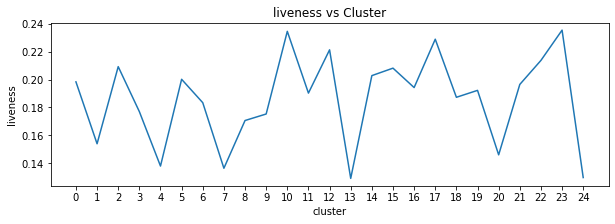

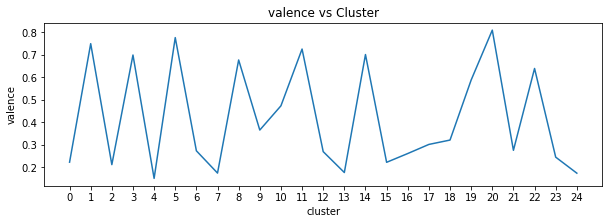

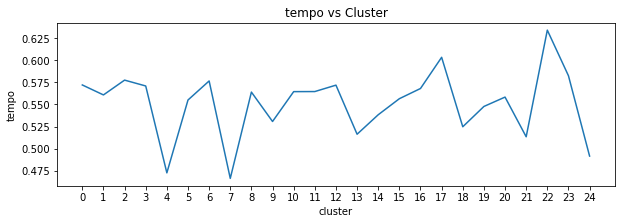

In [15]:
for i in audio_norm_df.columns:
    if i != 'cluster':
        plot_1d_feature_line(audio_norm_df, i)

## Bivariate

In [16]:
# Function to plot bivariate data
def plot_2d_features_scatter(df, x, y):
    # Create df with two features and normalize them
    x_y_df = df[[x, y]]
    x_y_df_norm = MinMaxScaler().fit_transform(x_y_df)
    x_y_df_norm = pd.DataFrame(x_y_df_norm)
    x_y_df_norm.columns = [x,y]

    km = KMeans(n_clusters=10)
    km.fit(x_y_df_norm)
    cl_pos = pd.DataFrame(km.cluster_centers_)
    cl_pos.columns = [x, y]

    fig, ax = plt.subplots(figsize=(10, 8))
    plot_data = pd.DataFrame(x_y_df_norm)
    plot_data.columns = [x, y]
    plot_data['clusters'] = km.labels_

    plt.title('Comparing our centroids and our dataset')
    plt.xlabel(x+' normalised')
    plt.ylabel(y+' normalised')
    sns.scatterplot(data=plot_data, x=x, y=y, hue='clusters', palette='Set2', s=75)
    sns.scatterplot(data=cl_pos, x=x, y=y, color='red', s=250)
    plt.show()


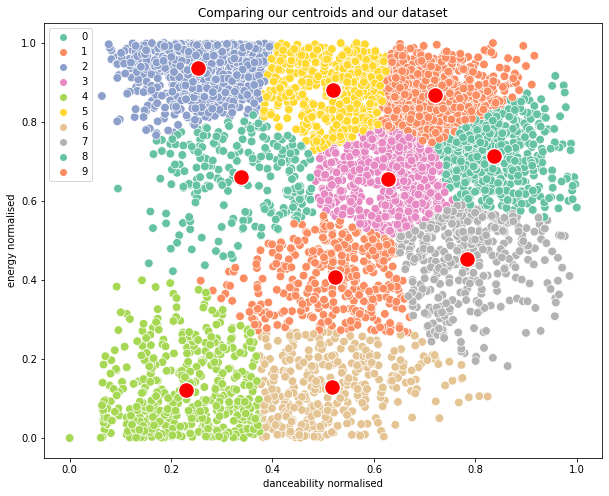

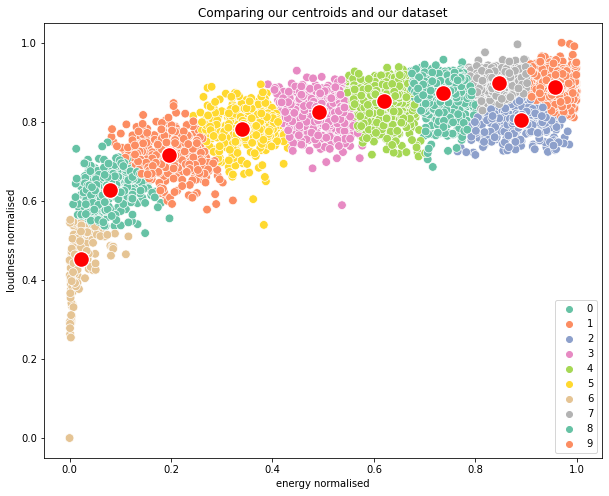

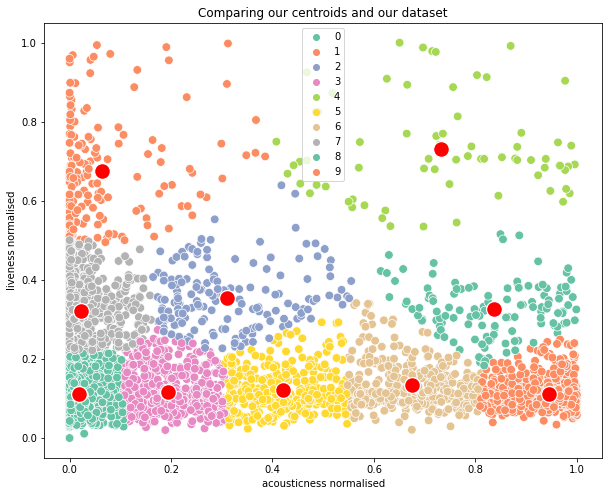

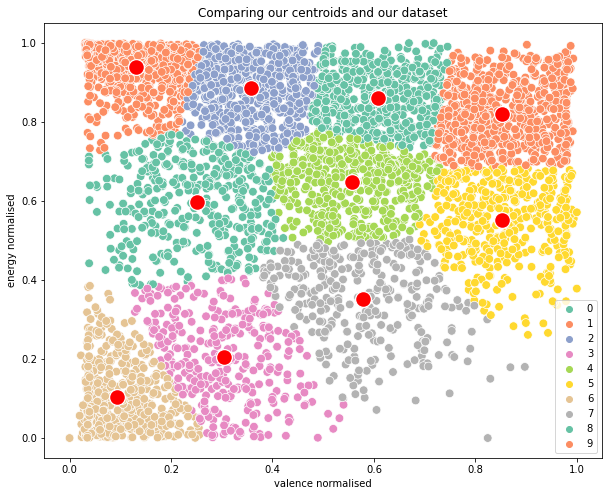

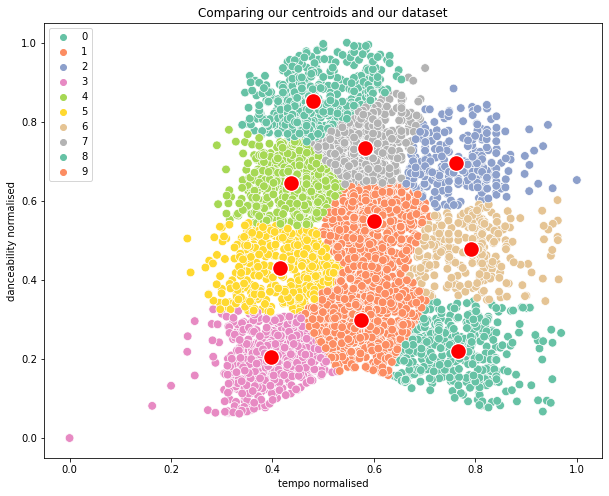

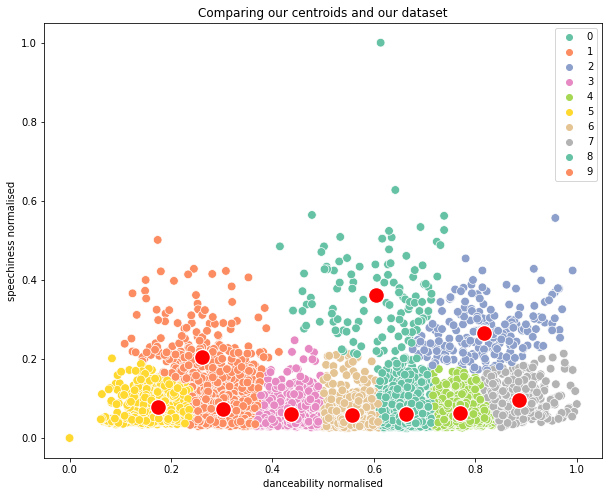

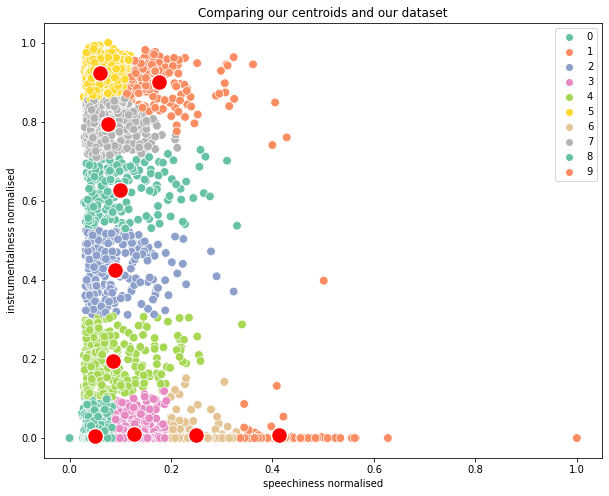

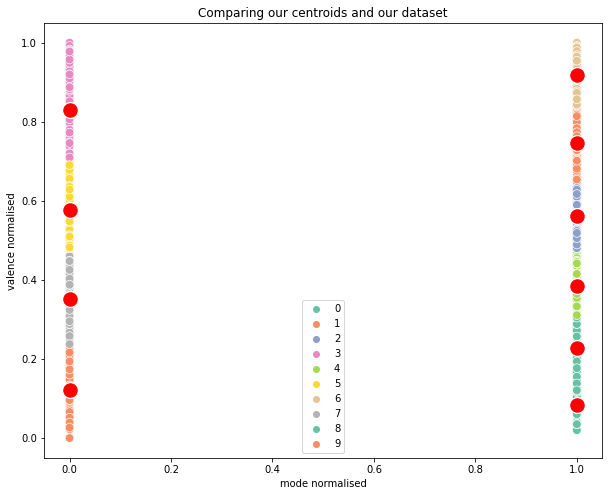

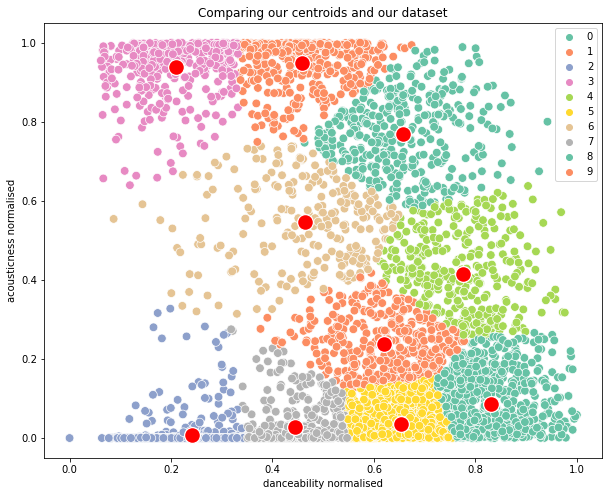

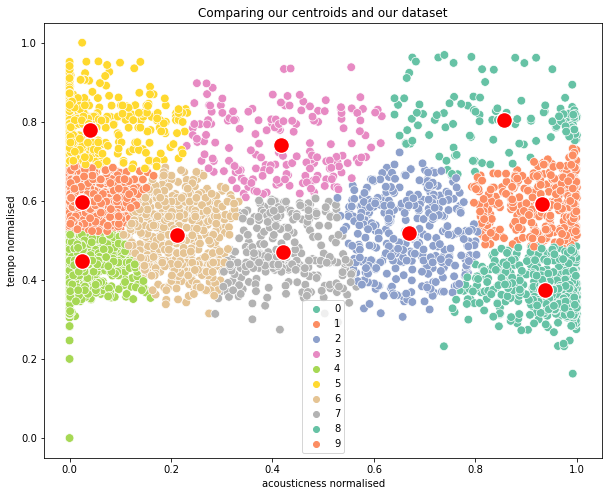

In [17]:
feature_list = [['danceability', 'energy'], ['energy', 'loudness'], ['acousticness', 'liveness'], ['valence', 'energy'], ['tempo', 'danceability'], ['danceability', 'speechiness'], ['speechiness', 'instrumentalness'], ['mode', 'valence'], ['danceability', 'acousticness'], ['acousticness', 'tempo']]

for features in feature_list:
    plot_2d_features_scatter(audio_norm_df, features[0], features[1])

### Silhouette Analysis

* For k = 2 the average to silhouette is: 0.6025
	- For cluster = 0 the silhouette value is: 0.6
	- For cluster = 1 the silhouette value is: 0.61


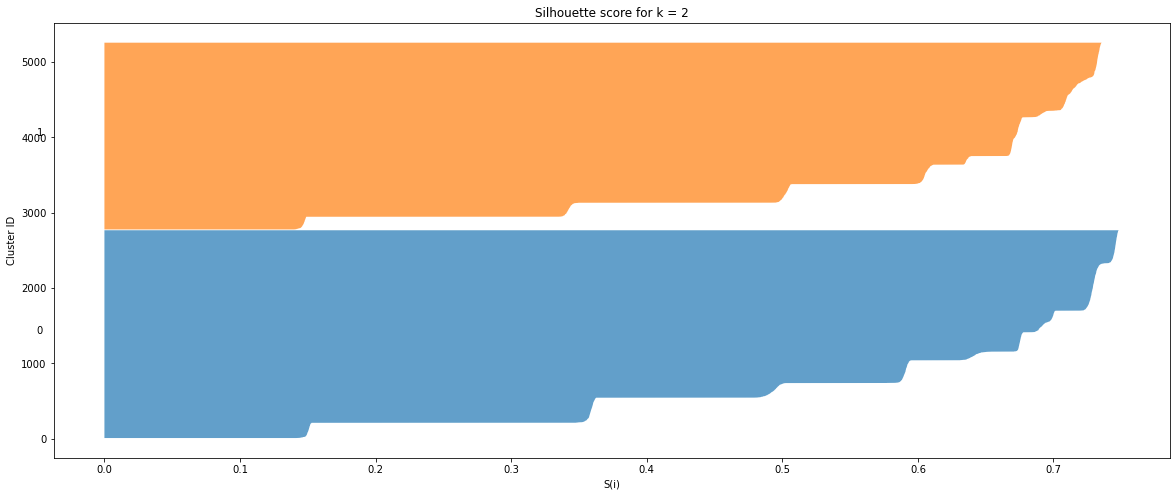

* For k = 3 the average to silhouette is: 0.5549
	- For cluster = 0 the silhouette value is: 0.47
	- For cluster = 1 the silhouette value is: 0.64
	- For cluster = 2 the silhouette value is: 0.56


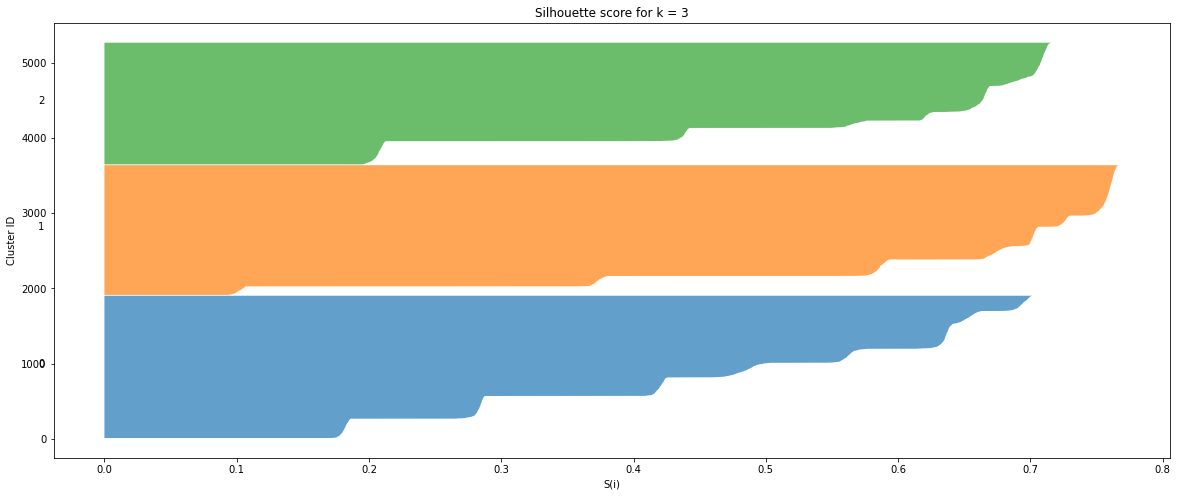

* For k = 4 the average to silhouette is: 0.5662
	- For cluster = 0 the silhouette value is: 0.51
	- For cluster = 1 the silhouette value is: 0.63
	- For cluster = 2 the silhouette value is: 0.59
	- For cluster = 3 the silhouette value is: 0.53


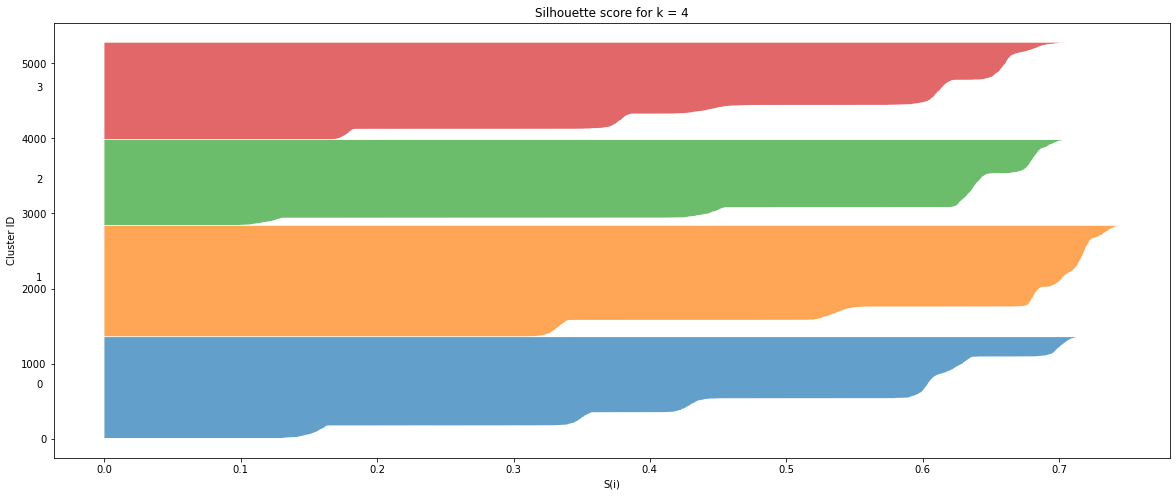

* For k = 5 the average to silhouette is: 0.516
	- For cluster = 0 the silhouette value is: 0.48
	- For cluster = 1 the silhouette value is: 0.6
	- For cluster = 2 the silhouette value is: 0.53
	- For cluster = 3 the silhouette value is: 0.5
	- For cluster = 4 the silhouette value is: 0.45


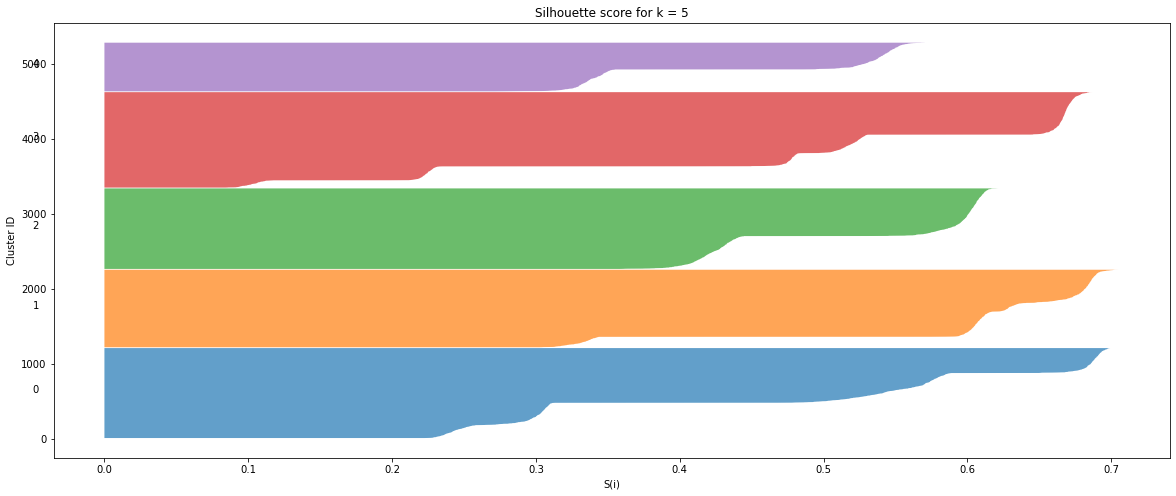

* For k = 6 the average to silhouette is: 0.4892
	- For cluster = 0 the silhouette value is: 0.37
	- For cluster = 1 the silhouette value is: 0.39
	- For cluster = 2 the silhouette value is: 0.51
	- For cluster = 3 the silhouette value is: 0.56
	- For cluster = 4 the silhouette value is: 0.51
	- For cluster = 5 the silhouette value is: 0.64


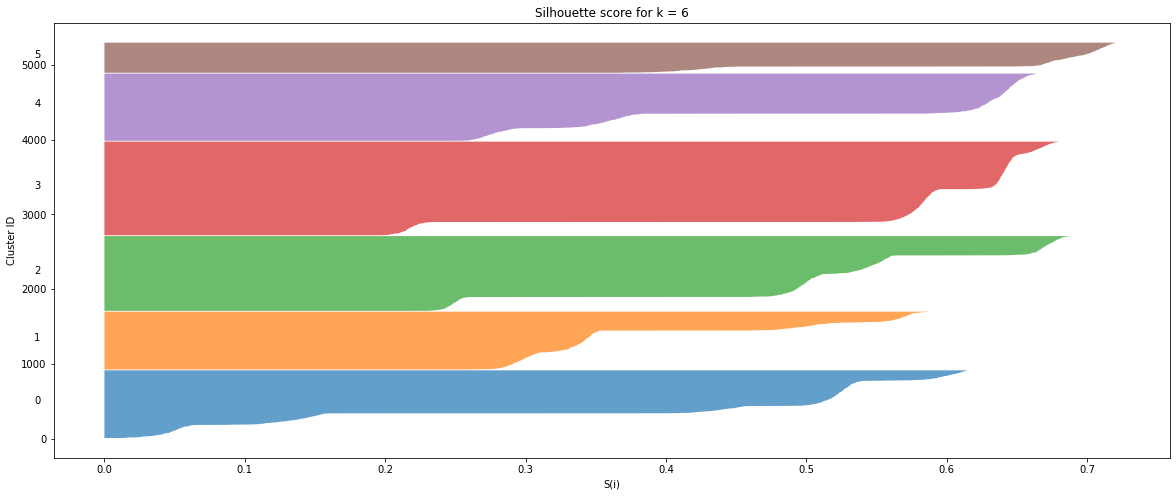

* For k = 7 the average to silhouette is: 0.4933
	- For cluster = 0 the silhouette value is: 0.49
	- For cluster = 1 the silhouette value is: 0.43
	- For cluster = 2 the silhouette value is: 0.48
	- For cluster = 3 the silhouette value is: 0.43
	- For cluster = 4 the silhouette value is: 0.53
	- For cluster = 5 the silhouette value is: 0.54
	- For cluster = 6 the silhouette value is: 0.58


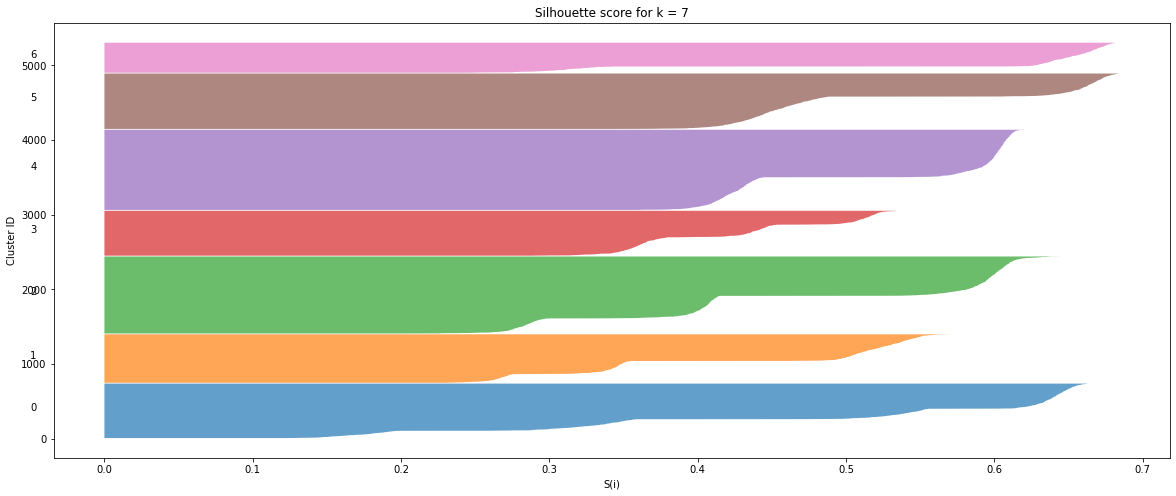

In [18]:
max_k = 8
data = audio_norm_df

for k in range(1, max_k): 
    kmean_model = KMeans(n_clusters=k).fit(data)
    labels = kmean_model.labels_
    
    if 1 < k < audio_norm_df.shape[0]: 

        fig, (axis1) = plt.subplots(1, 1)
        fig.set_size_inches(20, 8)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        sil_avg = silhouette_score(data, labels)
        print(f"* For k = {k} the average to silhouette is: {round(sil_avg,4)}")
        sample_sil_val = silhouette_samples(data, labels)
        
        y_lower = 10
        
        for i in range(k): 
            ith_cluster_sv = sample_sil_val[labels == i]
            print(f"\t- For cluster = {i} the silhouette value is: {round(np.mean(ith_cluster_sv),2)}")
            
            ith_cluster_sv.sort()
            
            # Calculate where to put the silhuette on the y axes
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
 
            
            # Paint the cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, 
                                alpha = 0.7)
            
            
            # Label the cluster
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))
            
            # Calculate the next y lower value for the next cluster of the graph
            y_lower = y_upper + 10 # we left 10 spaces without any observation
            
        axis1.set_title("Silhouette score for k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")

        plt.show()

## Labelling the clusters

In [19]:
audio_5k['cluster'] = m_km.labels_

In [20]:
audio_5k.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,cluster
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,18
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,3
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,5
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...,9
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...,21


# Generating playlists of n songs

In [21]:
# Function to generate playlist of n most similar songs
def get_playlist(model, main_df, norm_df, cluster, num_songs):
    cluster_distances = model.transform(norm_df.drop('cluster', axis=1)) # Calculate distances of each instance to every centroid
    cluster_distances = pd.DataFrame(cluster_distances) # Convert ndArray to DF
    cluster_distances['cluster'] = model.labels_
    cluster_k = cluster_distances.loc[cluster_distances['cluster'] == cluster][cluster] # Select rows belonging to cluster k and select distances to centroid k only
    cluster_k_indices = cluster_k.sort_values().index.to_list()[0:num_songs] # sort in ascending order of distances, and select top

    return main_df.loc[cluster_k_indices]

In [22]:
# Generate playlist of 30 songs belonging to cluster 1
get_playlist(m_km, audio_5k, audio_norm_df, 1, 30)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,cluster
4651,Make it ...,2PM,0.736,0.663,1,-4.370,0,0.1210,0.187000,0.000000,0.1100,0.753,92.924,,179707,4,4EF941VzqGMLFnYlXH03hG,https://open.spotify.com/track/4EF941VzqGMLFnY...,1
1539,Just Dance ...,Lady Gaga,0.821,0.741,1,-4.570,0,0.0313,0.027800,0.000025,0.1900,0.741,118.984,,244440,4,5vQXxfGn1bjv5WESrYVVpw,https://open.spotify.com/track/5vQXxfGn1bjv5WE...,1
584,Just Dance ...,Lady Gaga,0.822,0.737,1,-4.542,0,0.0314,0.026100,0.000042,0.1800,0.753,118.994,,241933,4,6HkjpGIOHv4y0IBAxUbE5z,https://open.spotify.com/track/6HkjpGIOHv4y0IB...,1
3372,La Fuga ...,Jiggy Drama,0.798,0.798,1,-6.779,0,0.1280,0.057400,0.000000,0.1560,0.766,97.037,,240000,4,4fhjhwazrEfayRC7l52TZ0,https://open.spotify.com/track/4fhjhwazrEfayRC...,1
1424,"Baby, I Love Your Way ...",Big Mountain,0.651,0.747,1,-7.269,0,0.0699,0.052800,0.000000,0.2070,0.776,147.518,,249520,4,2le9fblYnfoLr9dkZIsJUa,https://open.spotify.com/track/2le9fblYnfoLr9d...,1
2688,Alors on danse ...,Stromae,0.792,0.588,1,-9.319,0,0.0770,0.092800,0.001550,0.0656,0.731,119.950,,206253,4,6uFreJoeTZVC7MgC7B6rF1,https://open.spotify.com/track/6uFreJoeTZVC7Mg...,1
2366,Ritual ...,Ghost,0.670,0.864,0,-5.200,0,0.0526,0.090100,0.000026,0.1190,0.732,132.010,,268747,4,4hxd9xX8SNH0R2XSrXRATW,https://open.spotify.com/track/4hxd9xX8SNH0R2X...,1
3247,Punto y Aparte ...,Tego Calderon,0.808,0.767,1,-4.912,0,0.0445,0.255000,0.019700,0.0886,0.722,94.998,,206493,4,388YhDYxPvaDIZQHWqpB4E,https://open.spotify.com/track/388YhDYxPvaDIZQ...,1
560,Ritual ...,Tiësto,0.647,0.726,3,-4.389,0,0.0552,0.157000,0.000000,0.0844,0.767,114.996,,198996,4,3M9Apu4OZfylLTFKvgEtKa,https://open.spotify.com/track/3M9Apu4OZfylLTF...,1
5025,Se iluminaba ...,Fred De Palma,0.791,0.693,0,-4.980,0,0.0639,0.081100,0.000000,0.0708,0.624,123.923,,174291,4,3VPOZWtj8mM89IiRNygxgS,https://open.spotify.com/track/3VPOZWtj8mM89Ii...,1


In [23]:
# Generate playlist of 30 songs belonging to cluster 7
get_playlist(m_km, audio_5k, audio_norm_df, 7, 30)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,cluster
1880,The Unforgettable ...,Dirk Maassen,0.410,0.0885,2,-19.523,0,0.0466,0.990,0.919,0.0985,0.1410,110.028,,359109,4,5n3e2n40UzvjkX9xLW0Dn6,https://open.spotify.com/track/5n3e2n40UzvjkX9...,7
2093,Home ...,Zimerman Orchestra,0.294,0.1070,2,-21.907,0,0.0360,0.872,0.921,0.0924,0.0834,79.991,,195960,4,2LwaCtKT5lCtN2tOSJ8tzV,https://open.spotify.com/track/2LwaCtKT5lCtN2t...,7
2517,Weaver Of Dreams - Remastered 2003/Rudy Van Ge...,Freddie Hubbard,0.418,0.2270,4,-15.537,0,0.0379,0.912,0.822,0.0956,0.2100,103.586,,395560,4,4N6JkrGD78eLooaTDmwo9s,https://open.spotify.com/track/4N6JkrGD78eLooa...,7
5211,Symphony No. 1 in B flat minor: Allegro Assai ...,William Walton,0.220,0.1540,3,-19.076,0,0.0339,0.909,0.882,0.0768,0.0392,108.080,,887067,4,3162cNjh7TALlf38YFvx44,https://open.spotify.com/track/3162cNjh7TALlf3...,7
1938,Danza delle Baccanti (Piano and Cello) ...,Remo Anzovino,0.382,0.2000,4,-19.446,0,0.0368,0.987,0.895,0.1040,0.0574,113.438,,163147,4,6b9PUl0DtSjkczVd5flFLV,https://open.spotify.com/track/6b9PUl0DtSjkczV...,7
5190,Sinfonietta: Andante con moto. Allegretto ...,Leoš Janáček,0.230,0.1390,3,-19.019,0,0.0382,0.827,0.872,0.0662,0.0547,111.069,,431000,4,1IKXHa724NJePo2byVpL7P,https://open.spotify.com/track/1IKXHa724NJePo2...,7
1990,Take Me to Church ...,Andy Stringer,0.425,0.1440,4,-17.430,0,0.0591,0.985,0.915,0.1100,0.1930,123.378,,123896,4,6Pbk8ZKG4sqL8ZcSbdHm3j,https://open.spotify.com/track/6Pbk8ZKG4sqL8Zc...,7
2089,A World ...,Annelie,0.342,0.0245,3,-28.261,0,0.0448,0.992,0.901,0.1060,0.0849,114.066,,270700,4,6Y27Jxspe6k2qHAd6KJHGd,https://open.spotify.com/track/6Y27Jxspe6k2qHA...,7
2596,When Sunny Gets Blue ...,McCoy Tyner,0.427,0.1140,2,-22.546,0,0.0509,0.843,0.863,0.0966,0.1140,60.484,,282320,4,1J9iVCaEriyoMXpj2XszhU,https://open.spotify.com/track/1J9iVCaEriyoMXp...,7
2009,Connected Colors - Solo Piano Version ...,Piano Novel,0.200,0.0623,3,-24.922,0,0.0474,0.992,0.941,0.1160,0.1010,122.392,,168587,4,73Q5VDA6CXofjBtGGWEZEQ,https://open.spotify.com/track/73Q5VDA6CXofjBt...,7
